In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy as sp
import sklearn as sk

In [5]:
STOCK_NAMES = ['AAPL','MSFT','AMZN','GOOG','BRKB',
              'FB','JNJ','JPM','XOM','V','WMT','BAC',
              'UNH','PFE','WFC','VZ','PG','CVX','T',
              'INTC','CSCO','HD','MA','KO','BA',
              'MRK','ORCL','DIS','CMCSA','PEP','C',
              'MCD','PM','DWDP','ABBV','NFLX','MDT',
              'ABT','NVDA','AMGN','NKE','ADBE','MO','LLY',
              'MMM','IBM','HON','UNP','ACN',
              'UTX']

PROJECT_PATH = '/pine/scr/s/i/siyangj/DeepStock/FinalProject/'
DATA_PATH = os.path.join(PROJECT_PATH,'Data/')

VOLUME_NORMALIZATION_ID = 'VOLUME_NORMALIZATION'

DATA_1 = os.path.join(DATA_PATH,'preprocessed_1.h5')
DATA_ID = 'DATA_PREPROCESSED_1'

NUM_DAYS = 5
NUM_PER_DAY = 389
NUM_STOCKS = 50
NUM_PER_STOCK = 5

In [3]:
df = pd.read_hdf(DATA_1,DATA_ID)
vol_norm = pd.read_hdf(DATA_1,VOLUME_NORMALIZATION_ID)

In [4]:
df

AAPL                                        \
                         open          high       low         close   
Time                                                                  
2018-11-05 09:32:00 -0.005092 -4.014098e-03 -0.003595 -3.666207e-03   
2018-11-05 09:33:00 -0.003519 -3.538779e-03 -0.003282 -1.457751e-03   
2018-11-05 09:34:00 -0.001605 -1.430403e-03  0.000615  1.385179e-03   
2018-11-05 09:35:00  0.001385  4.618424e-03  0.003171  3.458156e-03   
2018-11-05 09:36:00  0.002717 -1.264105e-03  0.000845 -7.069712e-04   
2018-11-05 09:37:00 -0.000249 -7.773427e-04  0.000242 -1.793312e-04   
2018-11-05 09:38:00 -0.000195  5.419520e-04 -0.000642 -1.675372e-03   
2018-11-05 09:39:00 -0.001577 -2.314359e-03 -0.001432 -1.701382e-03   
2018-11-05 09:40:00 -0.001601  1.924880e-03 -0.000049 -1.992531e-04   
2018-11-05 09:41:00 -0.000278 -2.413793e-03 -0.001632 -4.697970e-04   
2018-11-05 09:42:00 -0.000590 -1.283887e-03 -0.000298 -1.533742e-03   
2018-11-05 09:43:00 -0.001287 -2.076638e-03 -0.001561 -8.671523e-04   
2018-11-05 09:44:00 -0.000941  3.468265e-04  0.000223  8.679049e-04   
2018-11-05 09:45:00  0.000793  8.370480e-04  0.000305 -6.689460e-05   
2018-11-05 09:46:00  0.000000 -9.600681e-04 -0.000305  1.164540e-04   
2018-11-05 09:47:00  0.000130  1.609907e-03  0.000794  1.981964e-04   
2018-11-05 09:48:00  0.000117 -3.466864e-04  0.000248  4.458536e-04   
2018-11-05 09:49:00  0.000595 -5.031418e-04  0.000198 -5.446893e-04   
2018-11-05 09:50:00 -0.000594 -5.355688e-04 -0.002081 -1.486326e-03   
2018-11-05 09:51:00 -0.001635  6.438193e-04  0.000596  2.059145e-03   
2018-11-05 09:52:00  0.002084 -5.444197e-04  0.000298 -1.163626e-03   
2018-11-05 09:53:00 -0.001040 -2.971180e-04 -0.000397  6.444577e-04   
2018-11-05 09:54:00  0.000546  0.000000e+00  0.000149 -1.288085e-03   
2018-11-05 09:55:00 -0.001685  2.476719e-04 -0.000844  9.921127e-05   
2018-11-05 09:56:00  0.000943 -1.039964e-03  0.000497  2.976043e-04   
2018-11-05 09:57:00 -0.000446 -5.948840e-04 -0.001236 -2.280954e-03   
2018-11-05 09:58:00 -0.002059 -1.339286e-03 -0.001347  0.000000e+00   
2018-11-05 09:59:00  0.000149 -5.712015e-04  0.000647 -5.963918e-04   
2018-11-05 10:00:00 -0.000422 -4.224337e-04 -0.000995 -2.486449e-04   
2018-11-05 10:01:00 -0.000447  9.943817e-05 -0.000548 -1.287803e-03   
...                       ...           ...       ...           ...   
2018-11-09 15:31:00 -0.000342 -4.892607e-05  0.000245  1.223691e-04   
2018-11-09 15:32:00 -0.000098 -2.935708e-04 -0.000636 -2.691790e-04   
2018-11-09 15:33:00 -0.000196  4.404855e-04  0.000441  6.853674e-04   
2018-11-09 15:34:00  0.000077  3.685054e-05  0.000224 -6.364617e-05   
2018-11-09 15:35:00  0.000119 -2.814466e-04  0.000070 -5.234426e-04   
2018-11-09 15:36:00 -0.000147 -4.893326e-05 -0.000245 -4.895002e-05   
2018-11-09 15:37:00  0.000049  3.914852e-04  0.000196  4.895242e-04   
2018-11-09 15:38:00  0.000685  2.934990e-04  0.000294  2.446423e-04   
2018-11-09 15:39:00 -0.000098 -2.929239e-04 -0.000930  4.891650e-07   
2018-11-09 15:40:00 -0.000098 -4.891648e-07  0.000980 -2.450715e-04   
2018-11-09 15:41:00  0.000000  4.402485e-04  0.000049  9.785693e-05   
2018-11-09 15:42:00  0.000073 -4.400548e-04 -0.000049  9.784736e-05   
2018-11-09 15:43:00  0.000024  2.543658e-04  0.000049  3.032971e-04   
2018-11-09 15:44:00  0.000489  1.369314e-04  0.000391 -5.868487e-05   
2018-11-09 15:45:00  0.001033  9.837942e-04 -0.000013  4.931019e-05   
2018-11-09 15:46:00  0.000162  1.622004e-04 -0.000183  2.041988e-06   
2018-11-09 15:47:00 -0.001340 -1.144842e-03 -0.000147 -2.958717e-04   
2018-11-09 15:48:00 -0.000245 -3.422816e-04 -0.000538 -2.445945e-04   
2018-11-09 15:49:00 -0.000098  1.467423e-04  0.000490  7.339629e-05   
2018-11-09 15:50:00  0.000024  0.000000e+00 -0.000049  2.691000e-04   
2018-11-09 15:51:00  0.000269  1.956277e-04  0.000000 -2.934846e-04   
2018-11-09 15:52:00 -0.000489 -1.129529e-04 -0.000049  1.957139e-04   
2018-11-09 15:53:00  0.000244 -2.293545e-04  0.00

In [6]:
vol_norm

,Mean,Variance
Stock,,
AAPL,85781.931136,1.088627e+10
MSFT,64422.607149,2.481841e+09
AMZN,14320.075293,1.634070e+08
GOOG,3850.508844,2.007058e+07
BRKB,9611.815893,1.580579e+08
FB,43122.431808,1.659391e+09
JNJ,10800.471465,1.575029e+08
JPM,24289.398876,5.720733e+08
XOM,28449.228792,1.110675e+09


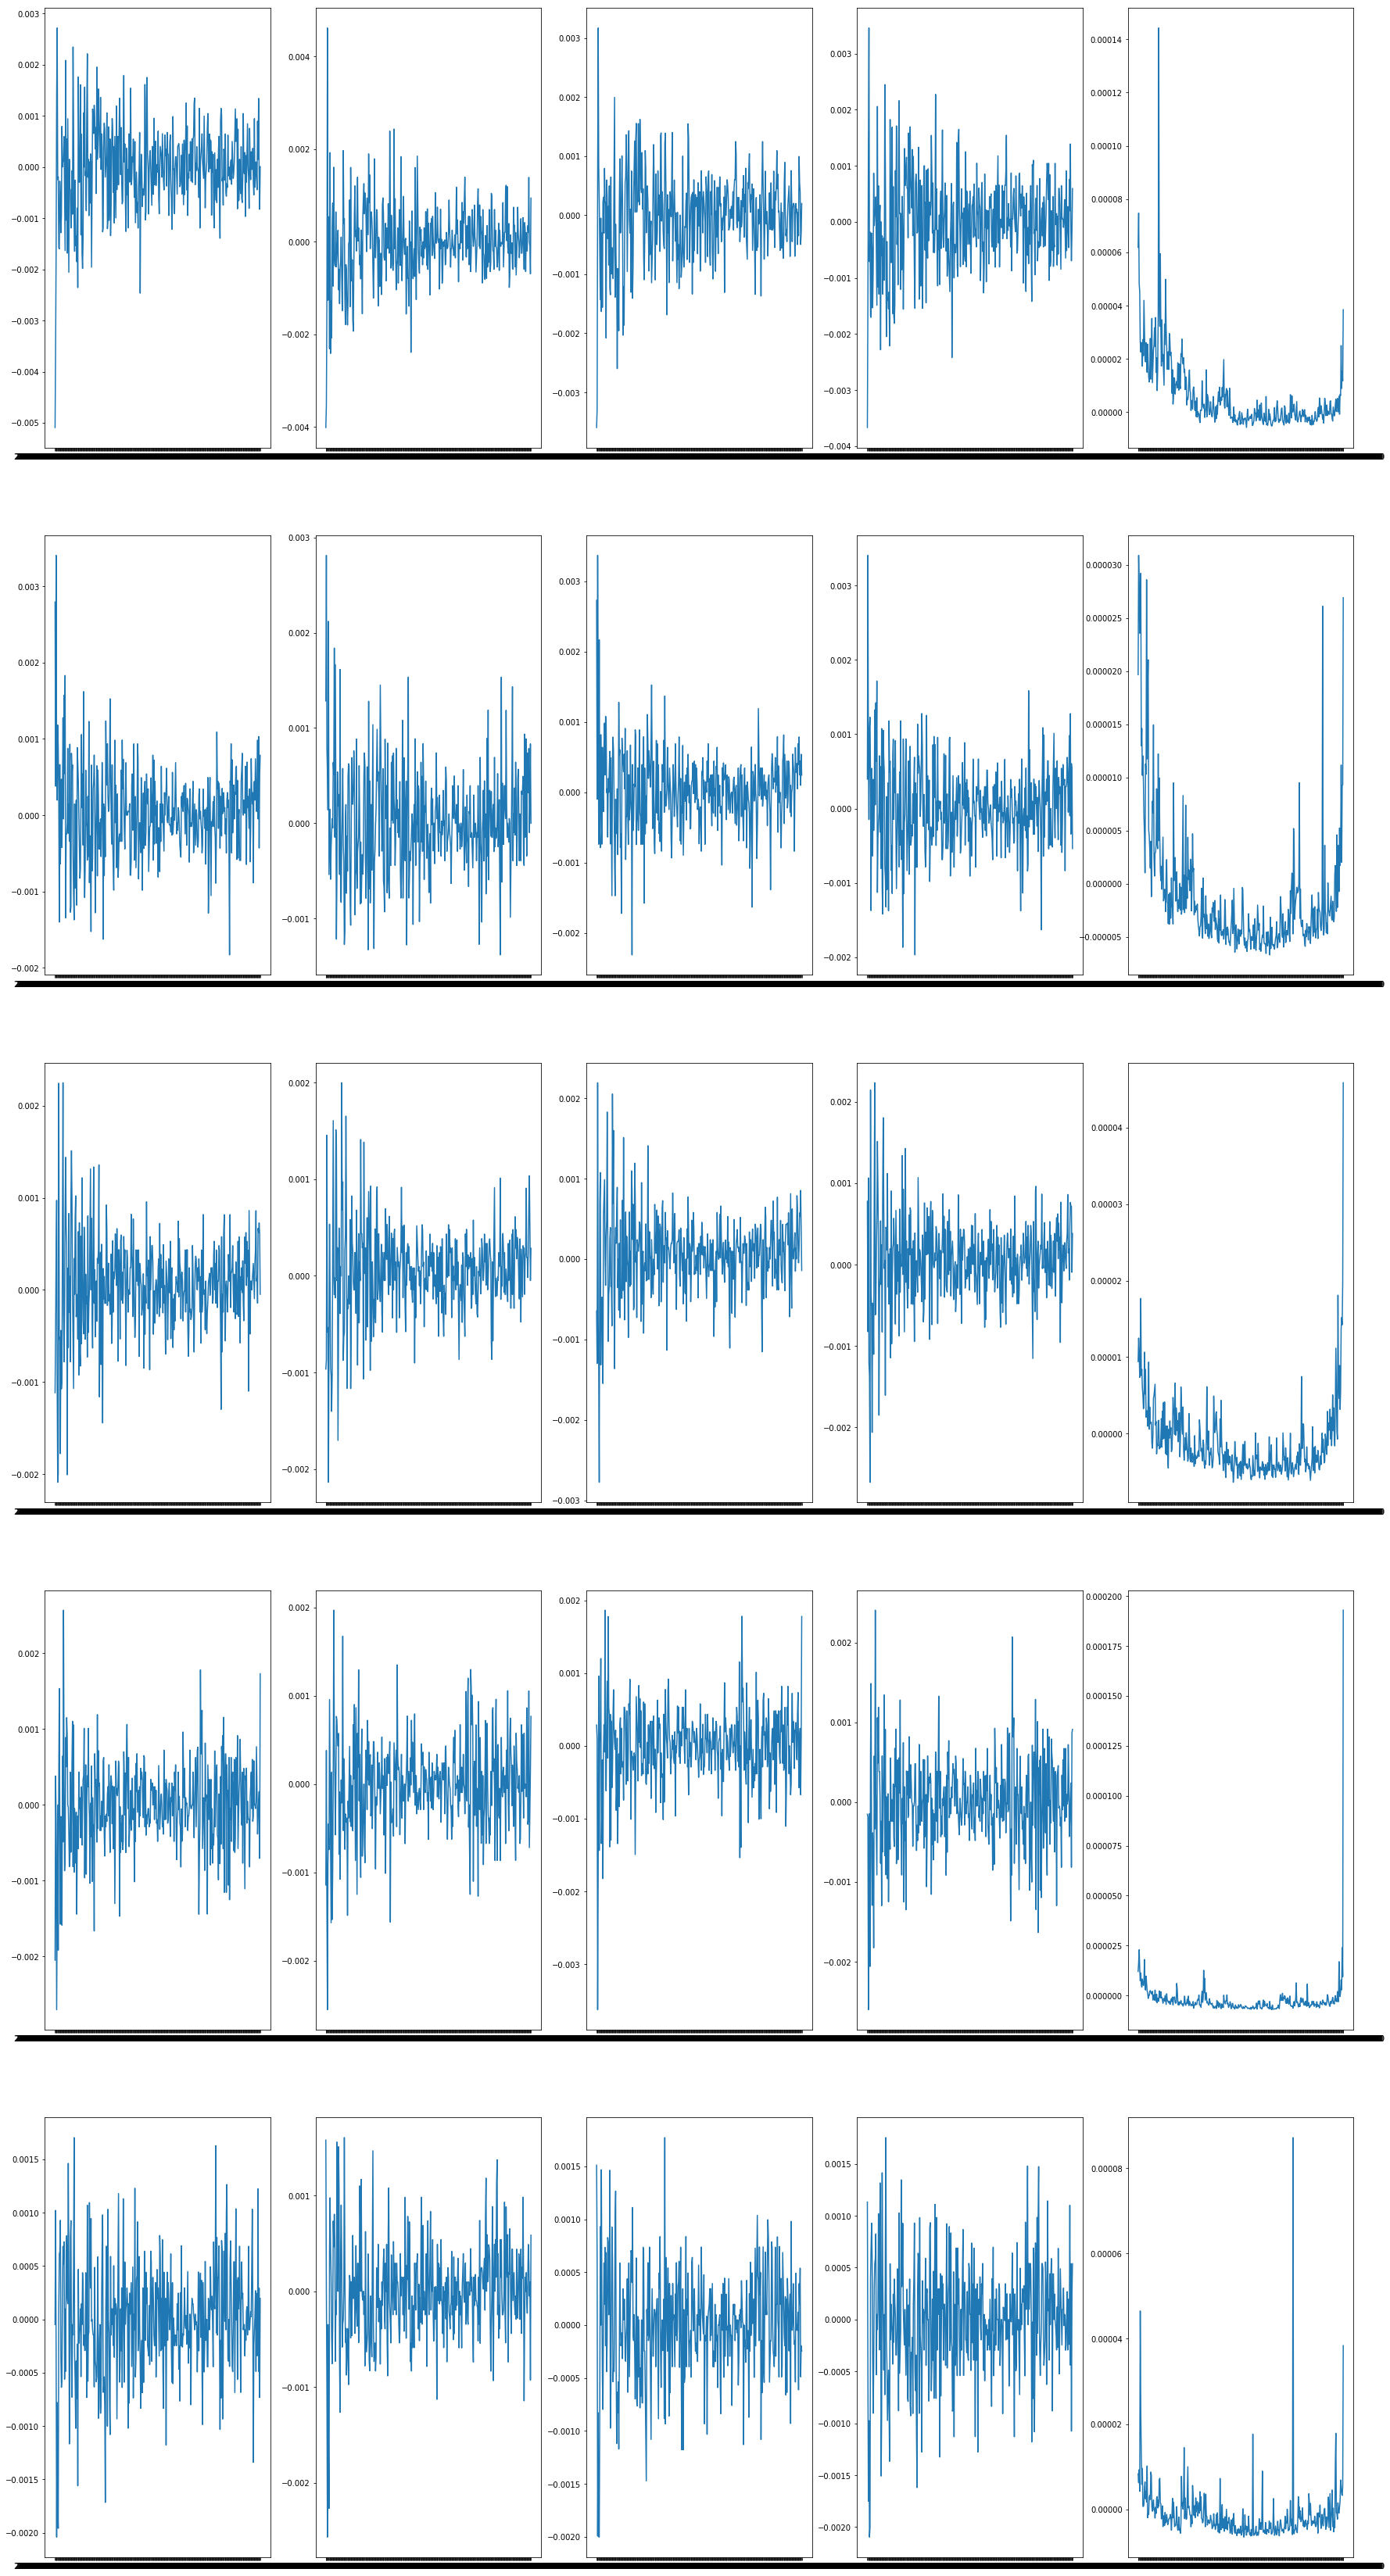

In [7]:
stock_index = 0
stock_start = stock_index * NUM_PER_STOCK
f,axes = plt.subplots(NUM_DAYS,NUM_PER_STOCK,figsize=(30,60))
for i in range(NUM_DAYS):
    for j in range(NUM_PER_STOCK):
        axes[i][j].plot(df.iloc[i*NUM_PER_DAY:(i+1)*NUM_PER_DAY,stock_start+j])